In [1]:
from model import ResNet
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import PIL
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
TRAIN_BATCH_SIZE = 20

EVAL_BATCH_SIZE = 100

# images are 32x32
# flip randomly for hopefully added robustness
# upscale them and normalise them to [-1, 1]
# ID for lanczos filter is some integer

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.25),
    transforms.RandomVerticalFlip(p=0.25),
    transforms.Resize(64, interpolation=PIL.Image.LANCZOS),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# no flips for test and valid
test_transform = transforms.Compose([
    transforms.Resize(64, interpolation=PIL.Image.LANCZOS),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=train_transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=TRAIN_BATCH_SIZE,
                                          shuffle=True, num_workers=8,
                                          drop_last=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)

valset, testset = torch.utils.data.random_split(testset, [5000, 5000])

valloader = torch.utils.data.DataLoader(valset, batch_size=EVAL_BATCH_SIZE,
                                        shuffle=True, num_workers=8,
                                        drop_last=True)


testloader = torch.utils.data.DataLoader(testset, batch_size=EVAL_BATCH_SIZE,
                                         shuffle=False, num_workers=8,
                                         drop_last=True)




classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# if cuda is available use it
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# functions to show an image

Files already downloaded and verified
Files already downloaded and verified


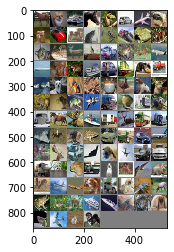

horse   dog  ship horse  bird   car plane   dog  bird   car horse   cat  bird truck  frog  deer   cat  frog  deer  bird


In [2]:


# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(20)))




In [3]:
model = torch.load("model.pt").to("cpu")  # temporary, will import from file later
def predict(inputs, labels):
    """Predict the output labels and compare with truth."""

    trues = [classes[idx] for idx in labels]
    outputs = model(inputs)
    predictions = outputs.argmax(axis=1)
    preds = [classes[idx] for idx in predictions]
    print(predictions==labels)
    print(float(((predictions==labels)).sum())/len(predictions))
    res = [f"true: {true},  pred: {pred}" for true, pred in zip(trues, preds)]
    return res, zip(trues, preds)


res = predict(images, labels)
# for result in res:
#     print(result)
    

tensor([ True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True, False,  True,  True,  True, False, False,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True])
0.85


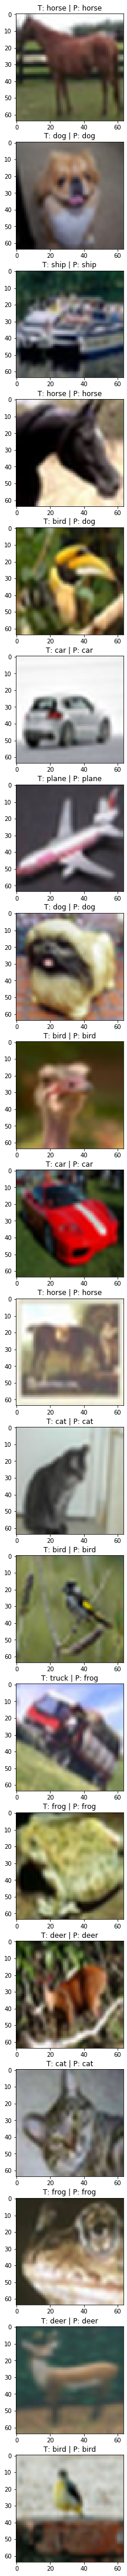

In [4]:
def display(inputs, labels, model):
    """Display images of single batch with prediction and truth."""

    trues = [classes[idx] for idx in labels]
    outputs = model(inputs)
    predictions = outputs.argmax(axis=1)
    preds = [classes[idx] for idx in predictions]
    fig = plt.figure(figsize=(80,80))
    for i in range(20):
        a = fig.add_subplot(20, 1, i+1)
        img = inputs[i]
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        a.set_title((f"T: {trues[i]} | "
                     f"P: {preds[i]}"))
    plt.show()
display(images, labels, model)



In [5]:
print(dict(model.named_parameters()).keys())

dict_keys(['initial.0.weight', 'initial.0.bias', 'initial.1.weight', 'initial.1.bias', 'res1.net.0.conv1.weight', 'res1.net.0.conv1.bias', 'res1.net.0.conv2.weight', 'res1.net.0.conv2.bias', 'res1.net.0.bn1.weight', 'res1.net.0.bn1.bias', 'res1.net.0.bn2.weight', 'res1.net.0.bn2.bias', 'res1.net.0.prelu1.weight', 'res1.net.0.prelu2.weight', 'res1.net.1.conv1.weight', 'res1.net.1.conv1.bias', 'res1.net.1.conv2.weight', 'res1.net.1.conv2.bias', 'res1.net.1.bn1.weight', 'res1.net.1.bn1.bias', 'res1.net.1.bn2.weight', 'res1.net.1.bn2.bias', 'res1.net.1.prelu1.weight', 'res1.net.1.prelu2.weight', 'res1.net.2.conv1.weight', 'res1.net.2.conv1.bias', 'res1.net.2.conv2.weight', 'res1.net.2.conv2.bias', 'res1.net.2.bn1.weight', 'res1.net.2.bn1.bias', 'res1.net.2.bn2.weight', 'res1.net.2.bn2.bias', 'res1.net.2.prelu1.weight', 'res1.net.2.prelu2.weight', 'res1.net.3.conv1.weight', 'res1.net.3.conv1.bias', 'res1.net.3.conv2.weight', 'res1.net.3.conv2.bias', 'res1.net.3.bn1.weight', 'res1.net.3.bn1.